# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


dataset yang saya gunakan bernama Land Mines Detection yang saya ambil dari website kaggle dengan link berikut: https://www.kaggle.com/datasets/ritwikb3/land-mines-detection

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Fauza27/datasets/refs/heads/main/Land%20mines.csv")
df.head()

,V,H,S,M
0,0.338157,0.000000,1,1
1,0.320241,0.181818,1,1
2,0.287009,0.272727,1,1
3,0.256284,0.454545,1,1
4,0.262840,0.545455,1,1


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V       338 non-null    float64
 1   H       338 non-null    float64
 2   S       338 non-null    int64  
 3   M       338 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 10.7 KB


In [4]:
df.describe()

,V,H,S,M
count,338.000000,338.000000,338.000000,338.000000
mean,0.430634,0.508876,3.517751,2.952663
std,0.195819,0.306043,1.721218,1.419703
min,0.197734,0.000000,1.000000,1.000000
25%,0.309737,0.272727,2.000000,2.000000
50%,0.359516,0.545455,4.000000,3.000000
75%,0.482628,0.727273,5.000000,4.000000
max,0.999999,1.000000,6.000000,5.000000


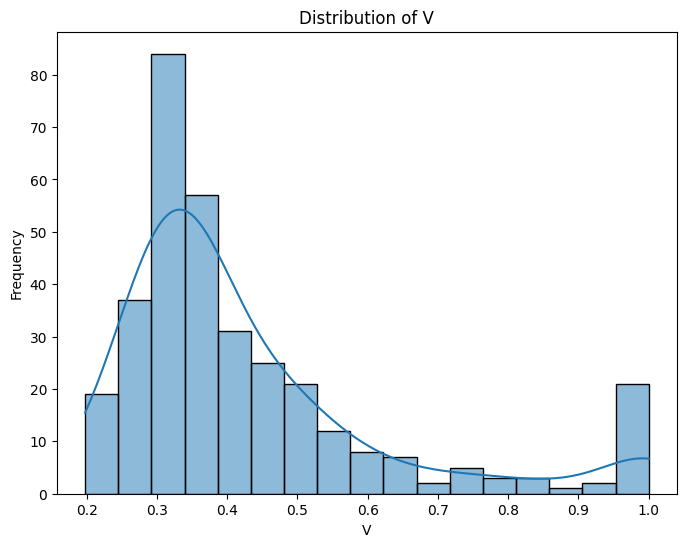

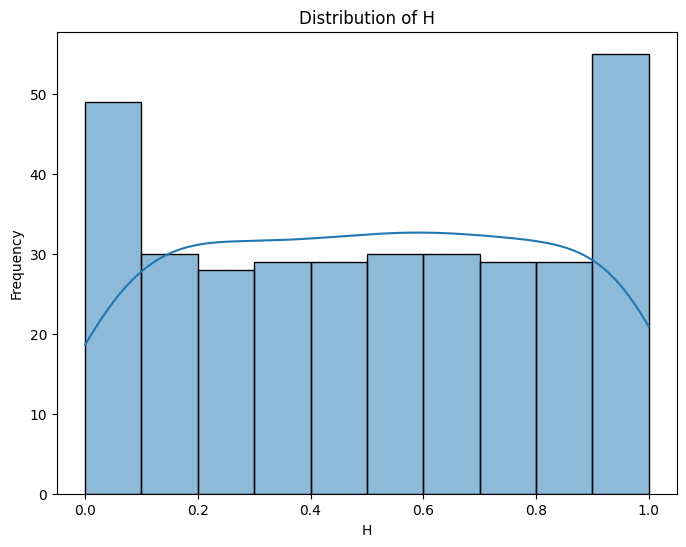

In [5]:
NUMERICAL_FEATURES = ['V', 'H']

for feature in NUMERICAL_FEATURES:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=feature, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

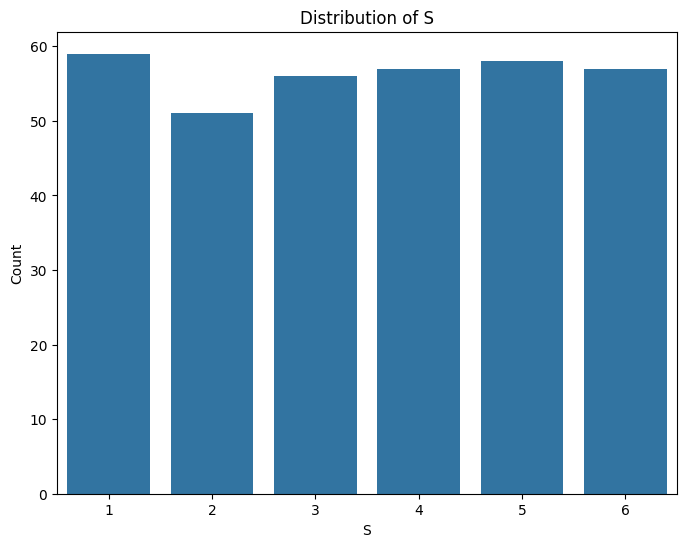

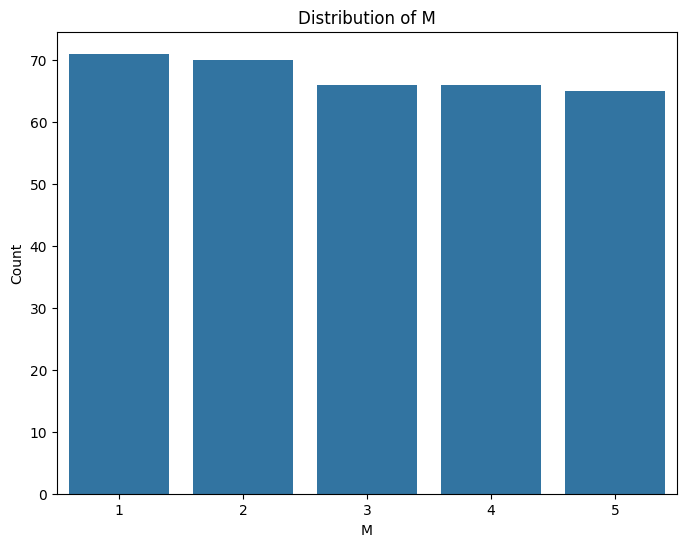

In [6]:
CATEGORICAL_FEATURES = ['S', 'M']

for feature in CATEGORICAL_FEATURES:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=feature)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

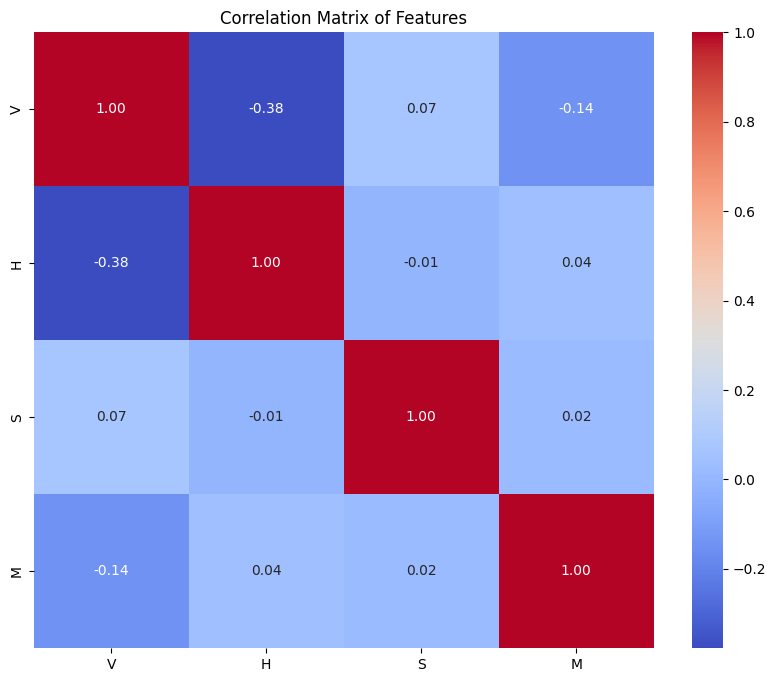

In [7]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [8]:
df = df.rename(columns={'V': 'Voltage', 'H': 'High', 'S': 'Soil type', 'M': 'Mine type'})
print("DataFrame after renaming columns:")
df.head()

DataFrame after renaming columns:


,Voltage,High,Soil type,Mine type
0,0.338157,0.000000,1,1
1,0.320241,0.181818,1,1
2,0.287009,0.272727,1,1
3,0.256284,0.454545,1,1
4,0.262840,0.545455,1,1


In [9]:
df.isnull().sum()

,0
Voltage,0
High,0
Soil type,0
Mine type,0


In [10]:
df.duplicated().sum()

np.int64(0)

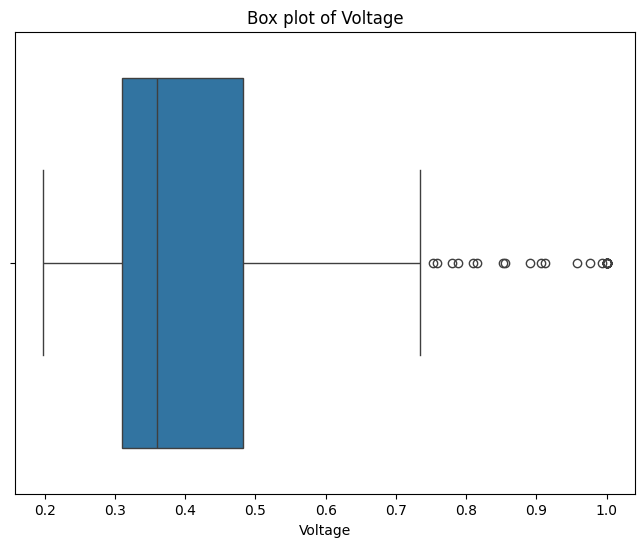

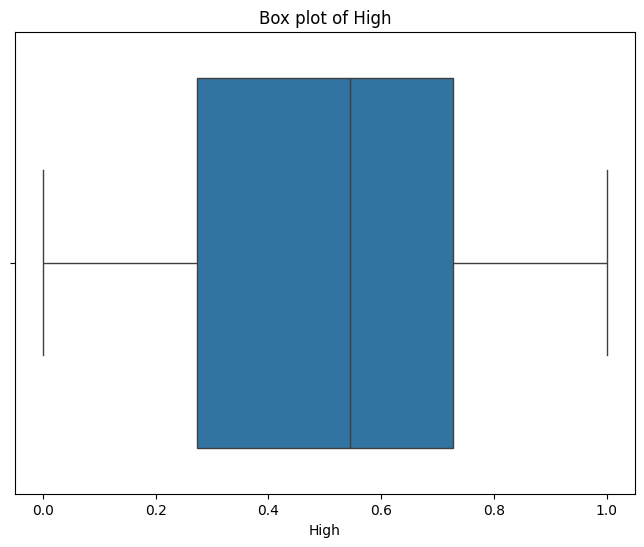

In [11]:
NUMERICAL_FEATURES = ['Voltage', 'High']

for feature in NUMERICAL_FEATURES:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x=feature)
    plt.title(f'Box plot of {feature}')
    plt.xlabel(feature)
    plt.show()

In [12]:
def cap_outliers_iqr(df, feature, multiplier=1.5):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    df[feature] = df[feature].clip(lower=lower_bound, upper=upper_bound)
    return df

for feature in NUMERICAL_FEATURES:
    df = cap_outliers_iqr(df, feature)

print("Data after outlier capping:")
df[NUMERICAL_FEATURES].head()

Data after outlier capping:


,Voltage,High
0,0.338157,0.000000
1,0.320241,0.181818
2,0.287009,0.272727
3,0.256284,0.454545
4,0.262840,0.545455


In [13]:
scaler = StandardScaler()
df[NUMERICAL_FEATURES] = scaler.fit_transform(df[NUMERICAL_FEATURES])

print("Standardized numerical features:")
df[NUMERICAL_FEATURES].head()

Standardized numerical features:


,Voltage,High
0,-0.498983,-1.665222
1,-0.620077,-1.070248
2,-0.844704,-0.772762
3,-1.052382,-0.177788
4,-1.008069,0.119699


In [14]:
df.head()

,Voltage,High,Soil type,Mine type
0,-0.498983,-1.665222,1,1
1,-0.620077,-1.070248,1,1
2,-0.844704,-0.772762,1,1
3,-1.052382,-0.177788,1,1
4,-1.008069,0.119699,1,1


In [16]:
df.to_csv('land mine preprocess.csv', index=False)
print("Preprocessed data saved to 'land mine preprocess.csv'")

Preprocessed data saved to 'land mine preprocess.csv'
